In [18]:
from Hamiltonian import Hamiltonian, MassType, get_mass
from Visualization import Visualize
import Potentials as p
import numpy as np

In [19]:
def ISW_1D(x, L):
    """1D infinite square well potential."""
    V = np.zeros_like(x)  # zero inside the well
    return V

a0_m = 5.29177210903e-11
L = 1e-9/a0_m   
H = Hamiltonian(N=500, L=L, potential_func=ISW_1D, mass=MassType.ELECTRON,
                ndim=1, num_states=10)

energies,eigenstates = H.solve()
print("Eigenvalues (Hartree):", energies)
print("Eigenvalues (ev):", energies*27.211386)

Eigenvalues (Hartree): [0.0137087  0.05483426 0.12337505 0.2193284  0.34269052 0.49345656
 0.67162059 0.87717562 1.11011355 1.37042522]
Eigenvalues (ev): [ 0.37303269  1.4921161   3.35720623  5.96822973  9.32508394 13.42763686
 18.27572718 23.86916428 30.2077282  37.29116971]


In [20]:
# --- Global Parameters ---
N_1D = 201         # Grid points for 1D
N_2D = 101         # Grid points for 2D (101x101)
N_3D = 51         # Grid points for 3D (41x41x41)

L_box = 10.0       # Box length (Bohr)
L_qho = 30.0       # Box length for QHO (Bohr)
k_au = 1.0         # Spring constant (a.u.)

mass_type = MassType.ELECTRON
mass = get_mass(mass_type)

num_states_to_find = 6  # How many states to solve for
num_states_to_plot = 4  # How many of those to plot


--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 0.048375        | 0.049348        | 1.9724    %
1          | 0.193487        | 0.197392        | 1.9783    %
2          | 0.435302        | 0.444132        | 1.9882    %
3          | 0.773761        | 0.789568        | 2.0020    %
4          | 1.208782        | 1.233701        | 2.0198    %
5          | 1.740261        | 1.776529        | 2.0415    %
--- Generating plots for 1D Particle in a Box ---


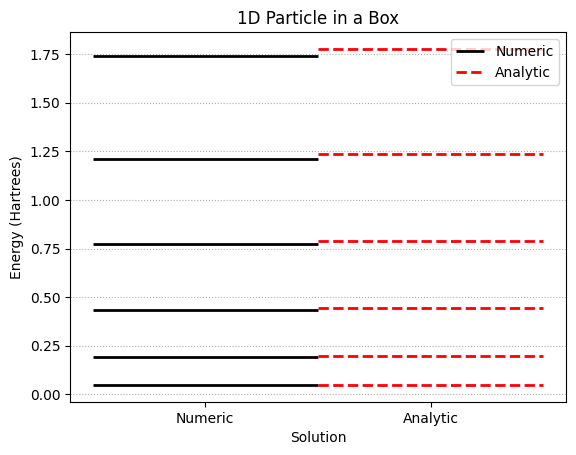

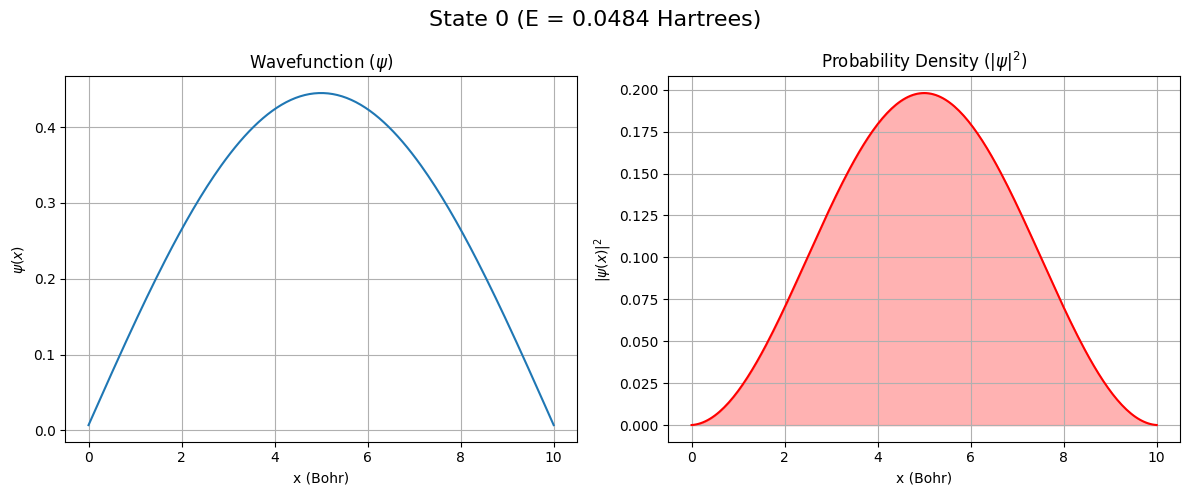

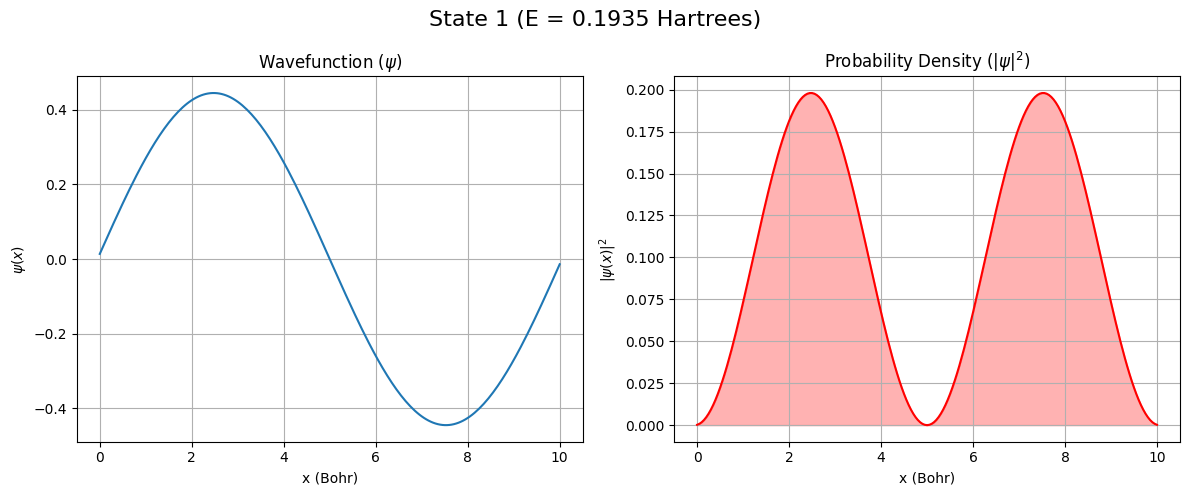

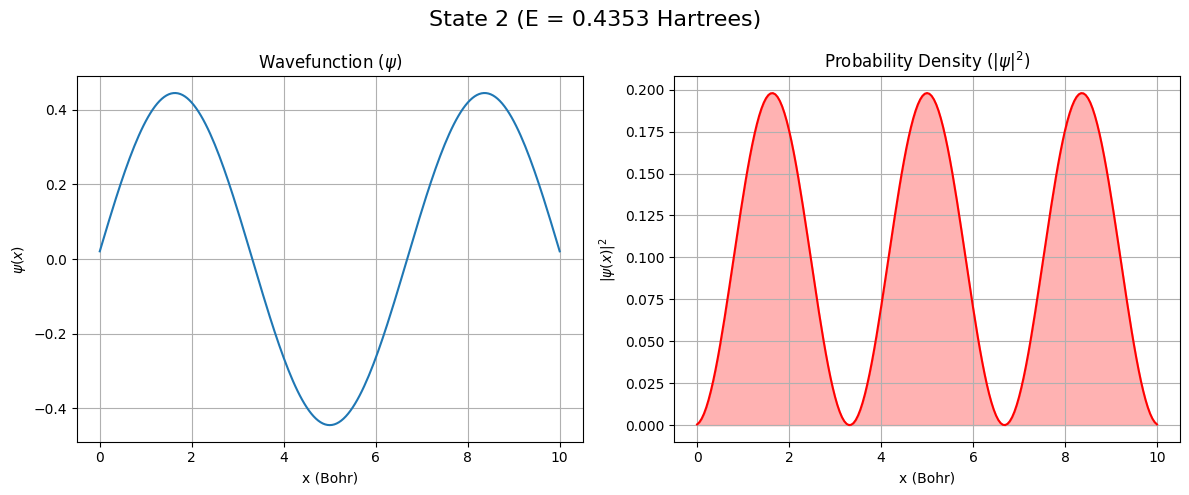

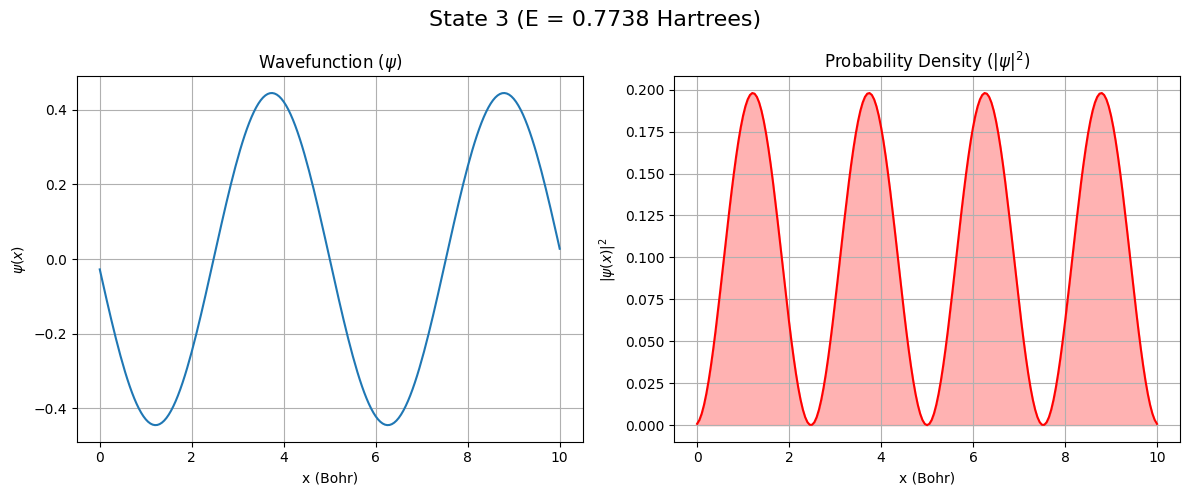


--- Normalization Check ---
State (i) | Discrete Norm             | Continuous Norm                | Is Normalized
--------------------------------------------------------------------------------
0        | 20.0000000000             | 1.0000000000                   | Yes         
1        | 20.0000000000             | 1.0000000000                   | Yes         
2        | 20.0000000000             | 1.0000000000                   | Yes         
3        | 20.0000000000             | 1.0000000000                   | Yes         
4        | 20.0000000000             | 1.0000000000                   | Yes         
5        | 20.0000000000             | 1.0000000000                   | Yes         


In [21]:
# Box 1D tests
H_1d_box = Hamiltonian(
    N=N_1D,
    L=L_box,
    potential_func=p.V_box_1D_AU,
    ndim=1,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_1d_box.solve()

# Get analytic energies
analytic_energies = p.E_box_1D_analytic_AU(num_states_to_find, L_box, mass)

# Store results in Hamiltonian object for Visualization
H_1d_box.numeric_energies = numeric_energies
H_1d_box.analytic_energies = analytic_energies
H_1d_box.eigenvectors = eigenvectors
H_1d_box.test_case_name = "1D Particle in a Box"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_1d_box = Visualize(H_1d_box, states_to_plot=num_states_to_plot)
vis_1d_box.plot_all()

dx = H_1d_box.dx

print("\n--- Normalization Check ---")
print(
    f"{'State (i)':<8} | {'Discrete Norm':<25} | {'Continuous Norm':<30} | {'Is Normalized':<12}"
)
print("-" * 80)
for i in range(num_states_to_find):
    psi = eigenvectors[:, i]
    discrete_norm = np.sum(np.abs(psi)**2)
    continuous_norm = discrete_norm * dx
    is_normalized = "Yes" if abs(continuous_norm - 1.0) < 0.01 else "No"
    print(f"{i:<8} | {discrete_norm:<25.10f} | {continuous_norm:<30.10f} | {is_normalized:<12}")



--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 0.499296        | 0.500000        | 0.1408    %
1          | 1.496475        | 1.500000        | 0.2350    %
2          | 2.490824        | 2.500000        | 0.3670    %
3          | 3.482331        | 3.500000        | 0.5048    %
4          | 4.470982        | 4.500000        | 0.6448    %
5          | 5.456765        | 5.500000        | 0.7861    %
--- Generating plots for 1D Quantum Harmonic Oscillator ---


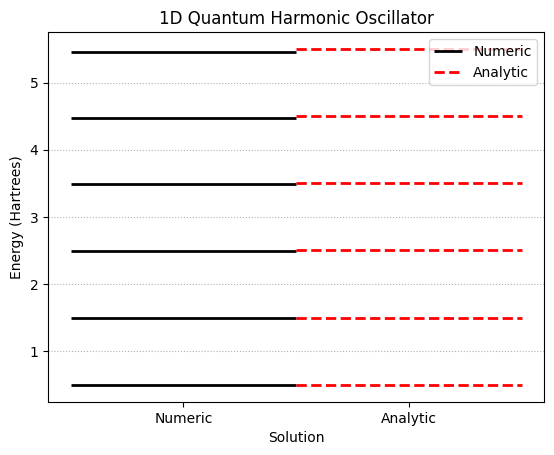

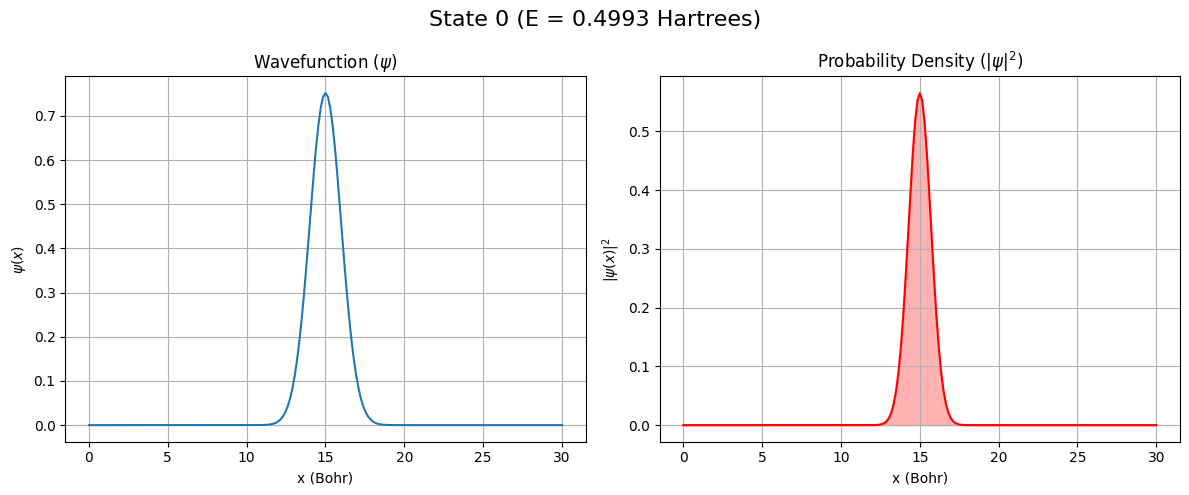

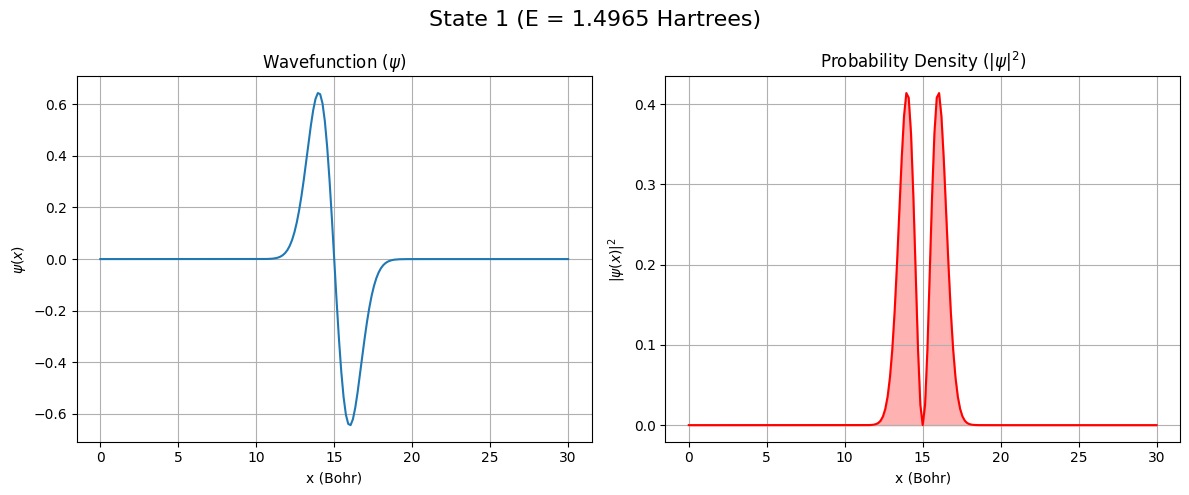

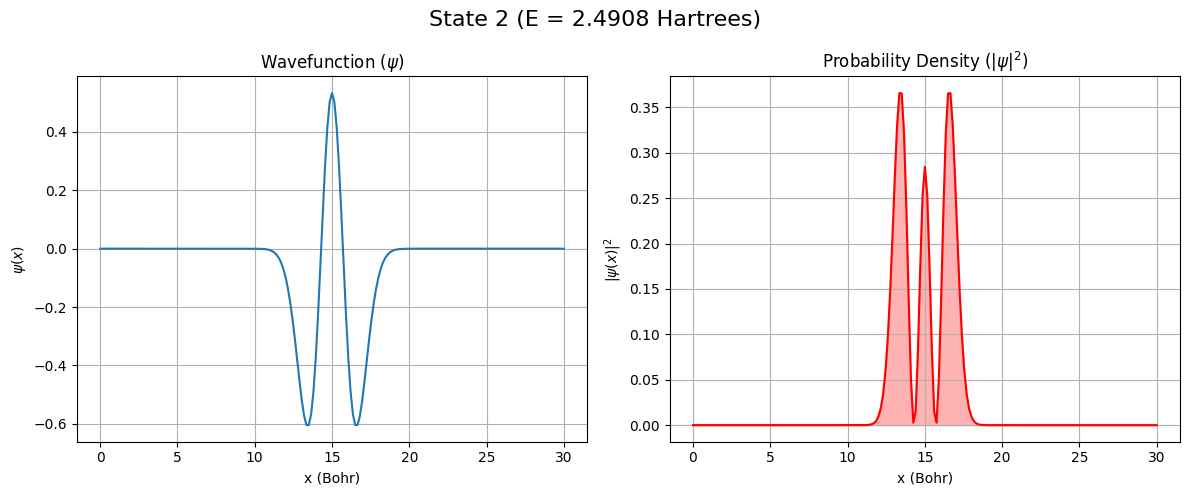

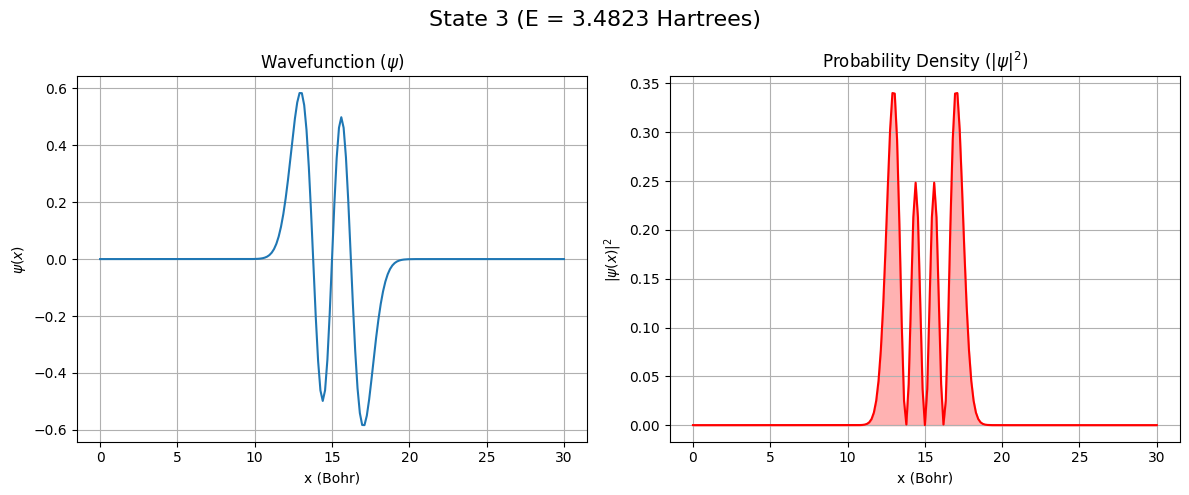

In [13]:
# 1D QHO tests
H_1d_qho = Hamiltonian(
    N=N_1D,
    L=L_qho,
    potential_func=lambda x, L: p.V_qho_1D_AU(x, L, k=k_au),
    ndim=1,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_1d_qho.solve()

# Get analytic energies
analytic_energies = p.E_qho_1D_analytic_AU(num_states_to_find, L_qho, mass, k=k_au)

# Store results in Hamiltonian object for Visualization
H_1d_qho.numeric_energies = numeric_energies
H_1d_qho.analytic_energies = analytic_energies
H_1d_qho.eigenvectors = eigenvectors
H_1d_qho.test_case_name = "1D Quantum Harmonic Oscillator"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_1d_qho = Visualize(H_1d_qho, states_to_plot=num_states_to_plot)
vis_1d_qho.plot_all()


--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 0.094856        | 0.098696        | 3.8907    %
1          | 0.237095        | 0.246740        | 3.9090    %
2          | 0.237095        | 0.246740        | 3.9090    %
3          | 0.379334        | 0.394784        | 3.9135    %
4          | 0.474010        | 0.493480        | 3.9454    %
5          | 0.474010        | 0.493480        | 3.9454    %
--- Generating plots for 2D Particle in a Box ---


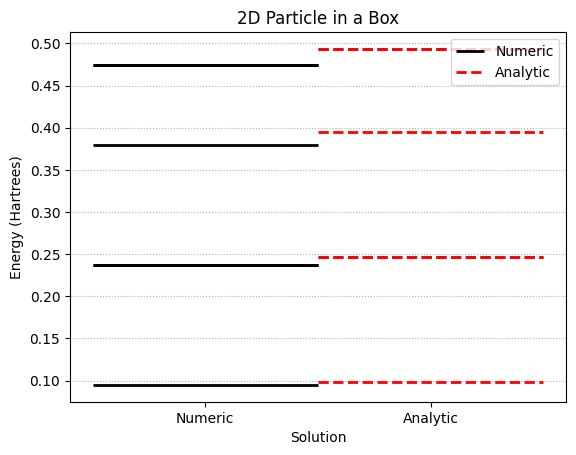

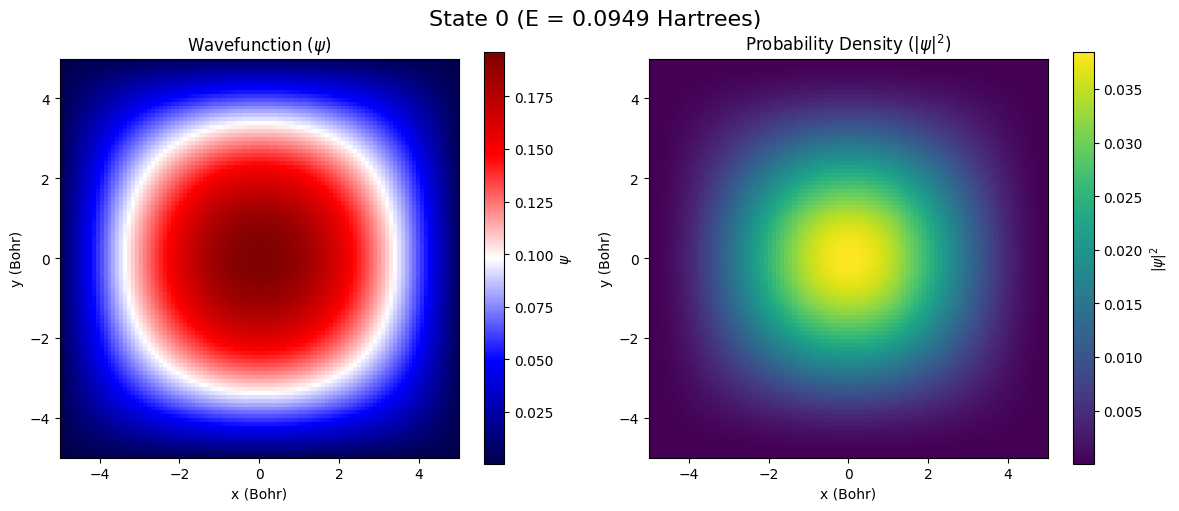

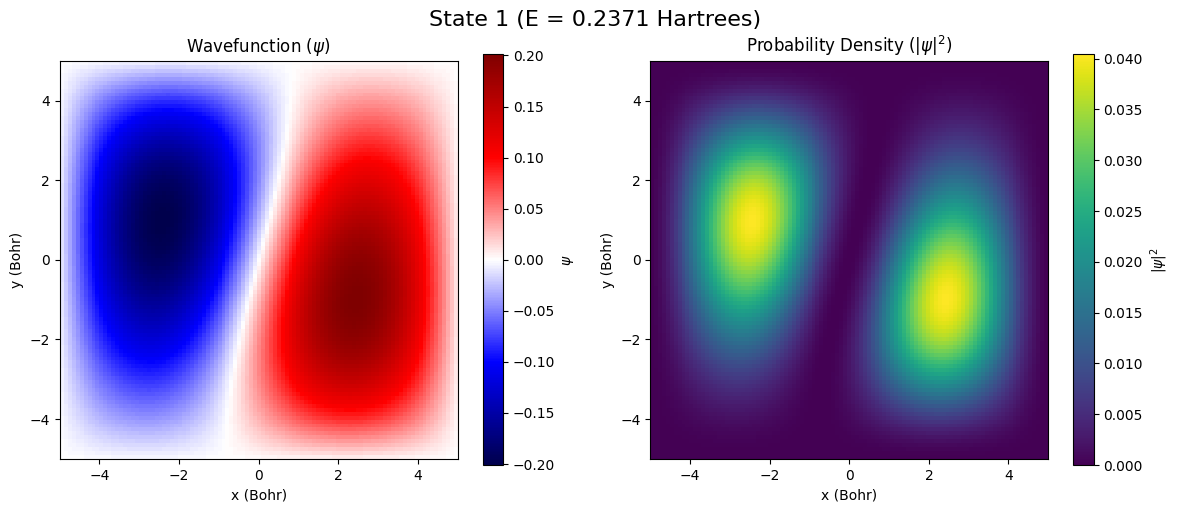

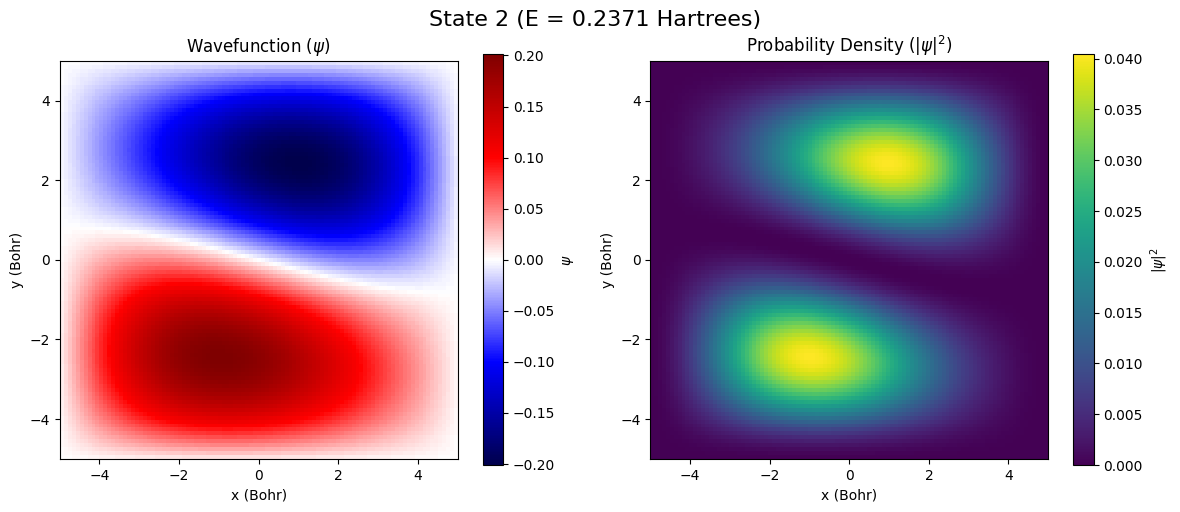

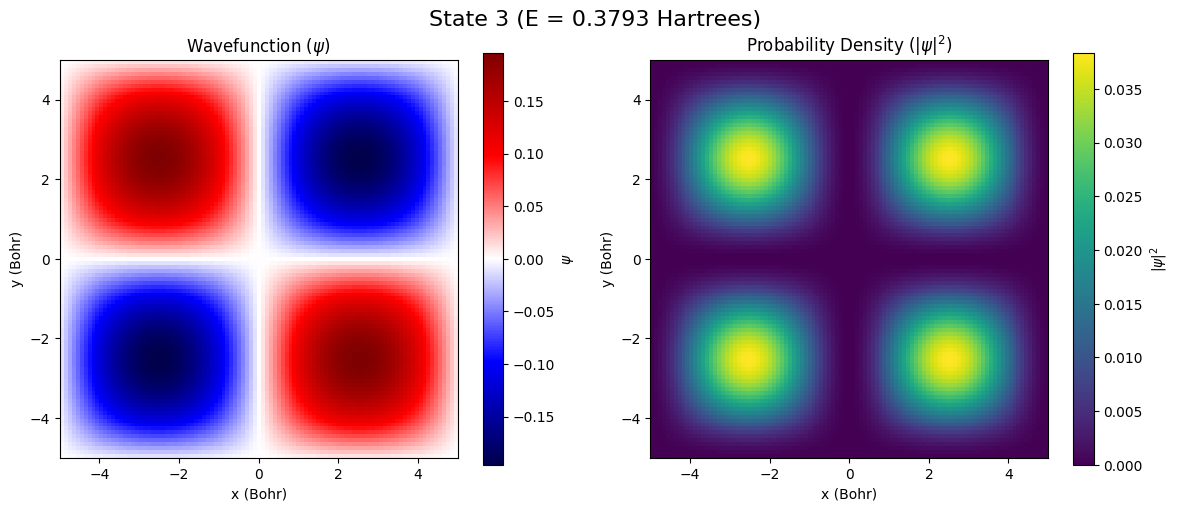

In [14]:
# 2D Box tests
H_2d_box = Hamiltonian(
    N=N_2D,
    L=L_box,
    potential_func=p.V_box_2D_AU,
    ndim=2,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_2d_box.solve()

# Get analytic energies
analytic_energies = p.E_box_2D_analytic_AU(num_states_to_find, L_box, mass)

# Store results in Hamiltonian object for Visualization
H_2d_box.numeric_energies = numeric_energies
H_2d_box.analytic_energies = analytic_energies
H_2d_box.eigenvectors = eigenvectors
H_2d_box.test_case_name = "2D Particle in a Box"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_2d_box = Visualize(H_2d_box, states_to_plot=num_states_to_plot)
vis_2d_box.plot_all()


--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 0.994343        | 1.000000        | 0.5657    %
1          | 1.982962        | 2.000000        | 0.8519    %
2          | 1.982962        | 2.000000        | 0.8519    %
3          | 2.960032        | 3.000000        | 1.3323    %
4          | 2.960032        | 3.000000        | 1.3323    %
5          | 2.971582        | 3.000000        | 0.9473    %
--- Generating plots for 2D Quantum Harmonic Oscillator ---


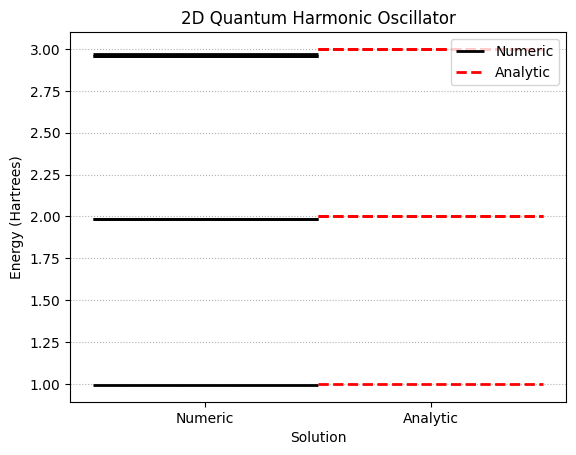

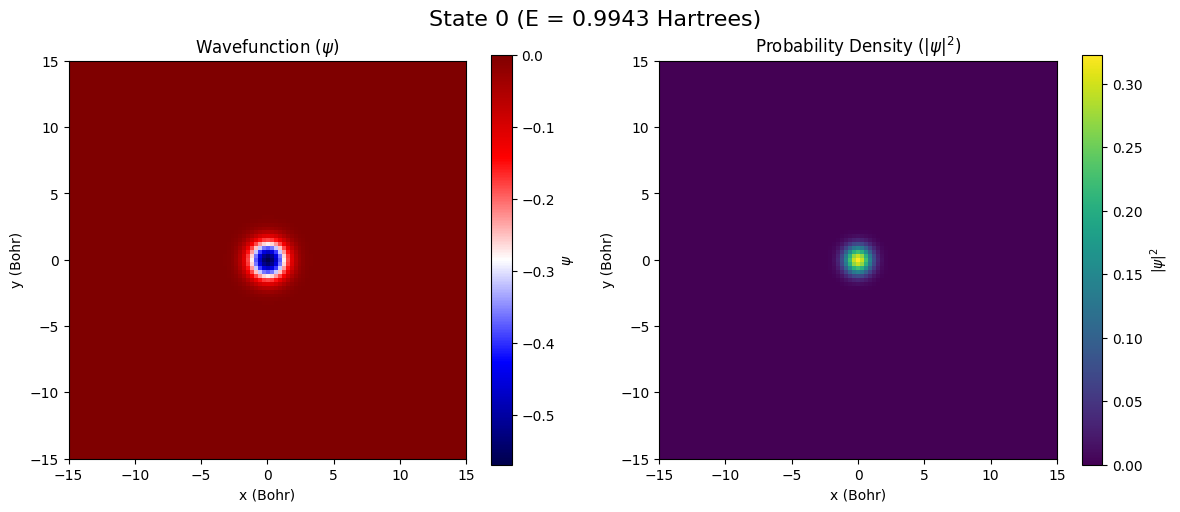

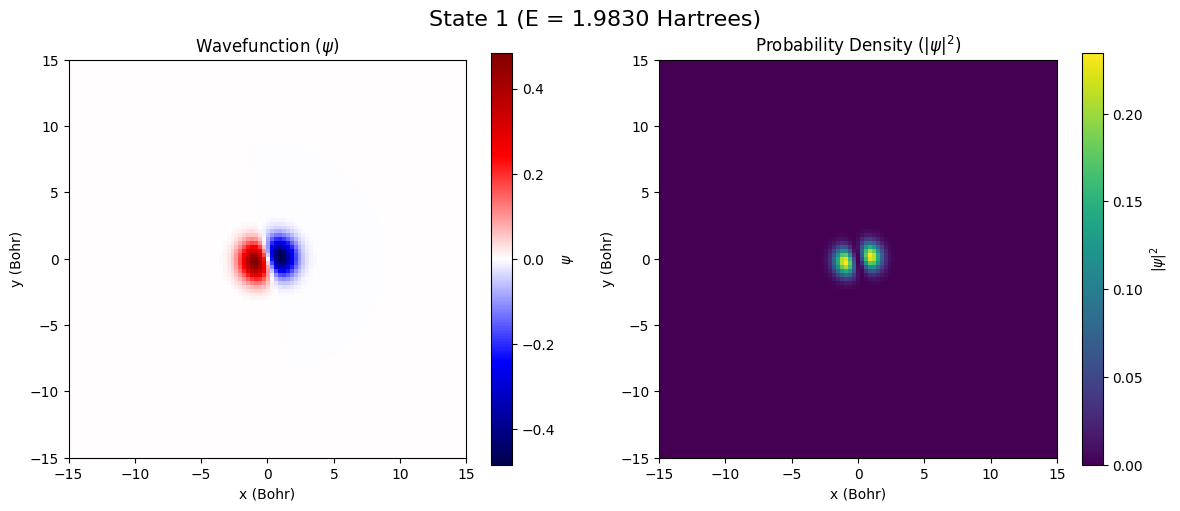

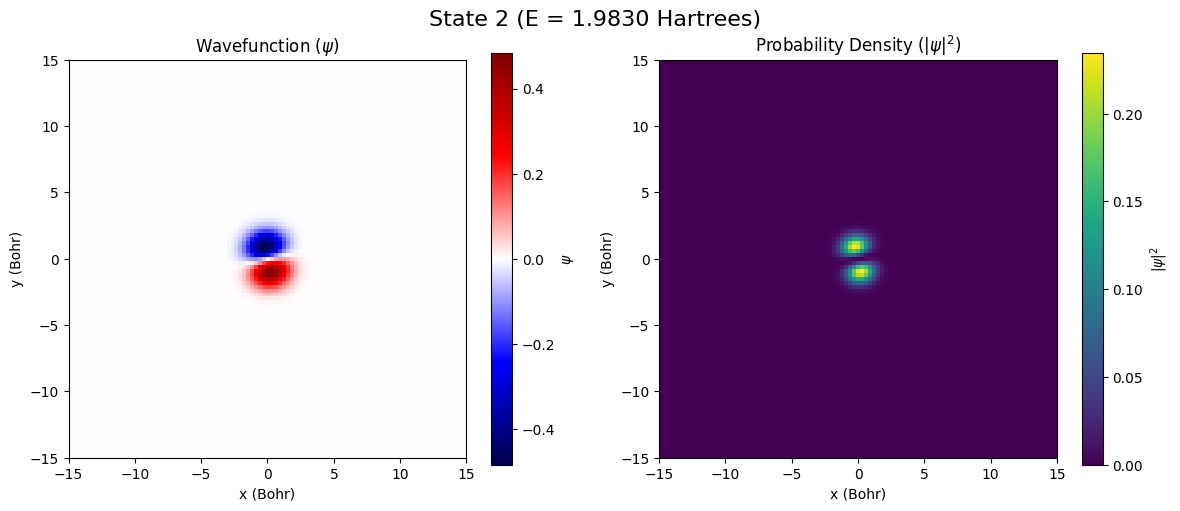

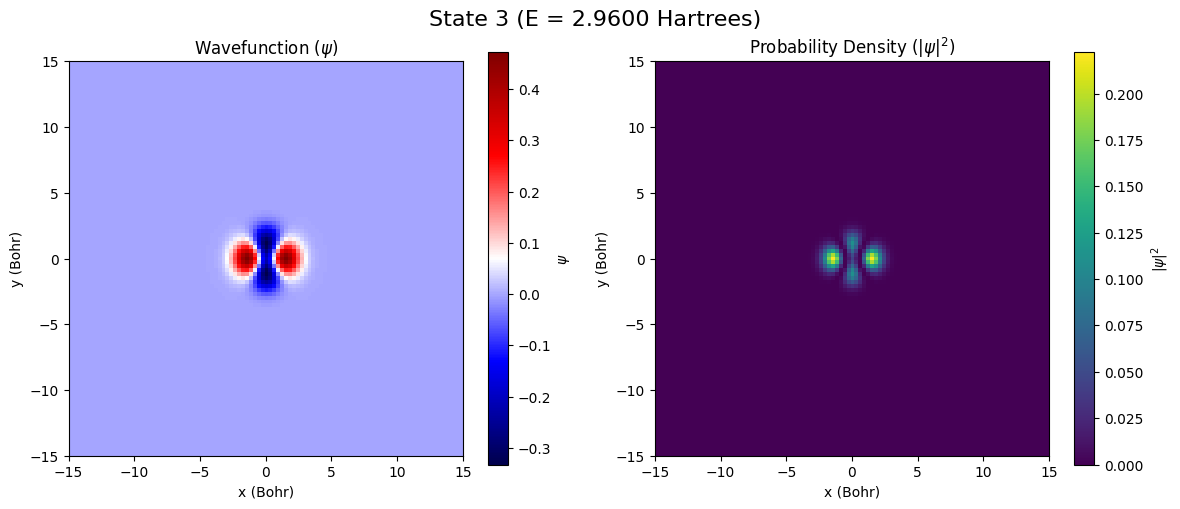

In [15]:
# 2D QHO tests
H_2d_qho = Hamiltonian(
    N=N_2D,
    L=L_qho,
    potential_func=lambda x, y, L: p.V_qho_2D_AU(x, y, L, k=k_au),
    ndim=2,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_2d_qho.solve()

# Get analytic energies
analytic_energies = p.E_qho_2D_analytic_AU(num_states_to_find, L_qho, mass, k=k_au)

# Store results in Hamiltonian object for Visualization
H_2d_qho.numeric_energies = numeric_energies
H_2d_qho.analytic_energies = analytic_energies
H_2d_qho.eigenvectors = eigenvectors
H_2d_qho.test_case_name = "2D Quantum Harmonic Oscillator"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_2d_qho = Visualize(H_2d_qho, states_to_plot=num_states_to_plot)
vis_2d_qho.plot_all()


--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 0.136833        | 0.148044        | 7.5725    %
1          | 0.273500        | 0.296088        | 7.6287    %
2          | 0.273500        | 0.296088        | 7.6287    %
3          | 0.273500        | 0.296088        | 7.6287    %
4          | 0.410167        | 0.444132        | 7.6474    %
5          | 0.410167        | 0.444132        | 7.6474    %
--- Generating plots for 3D Particle in a Box ---


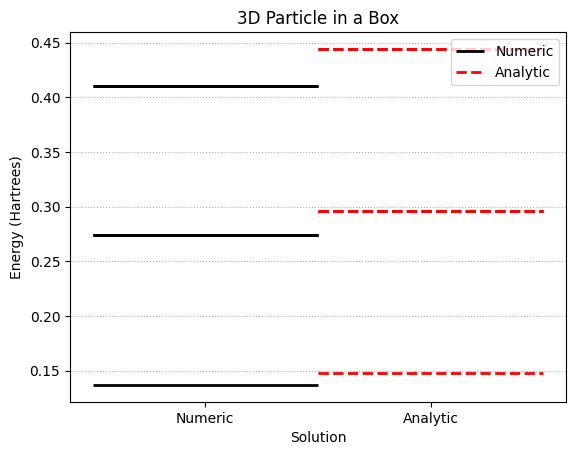

Plotting 3D State 0 as 2D slice at z=0.00


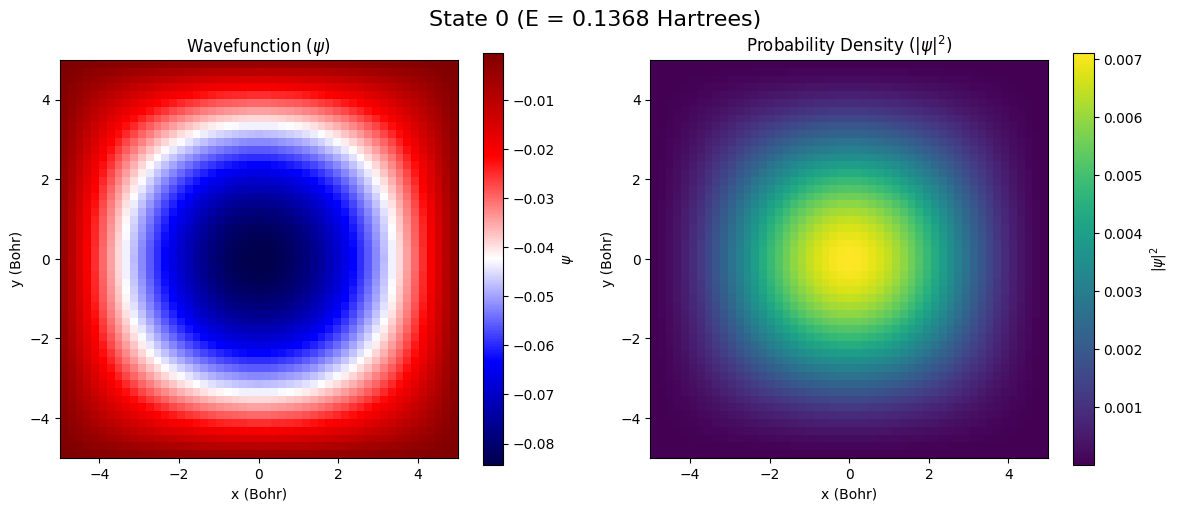

Plotting 3D State 1 as 2D slice at z=0.00


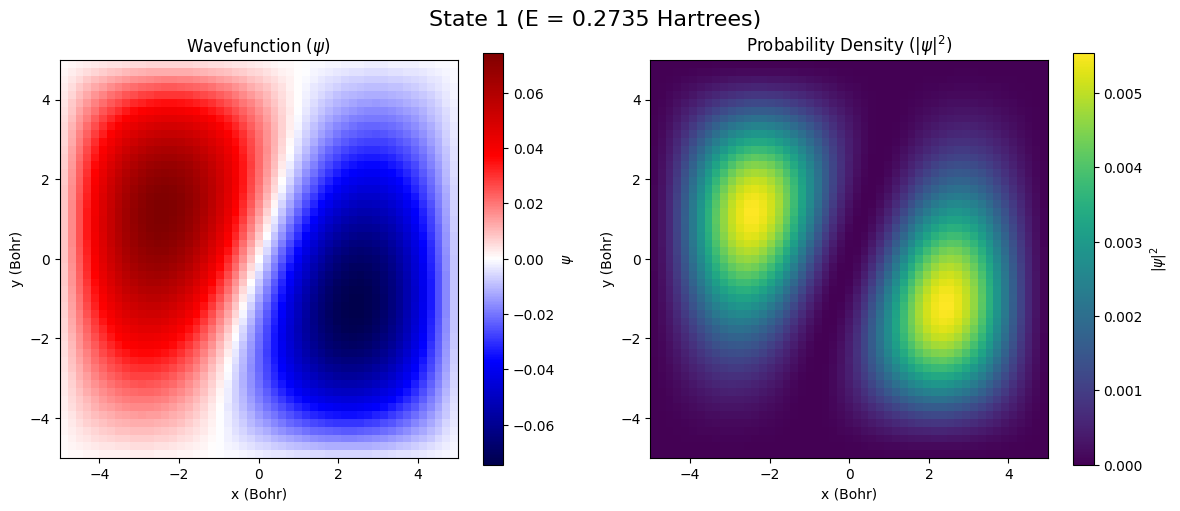

Plotting 3D State 2 as 2D slice at z=0.00


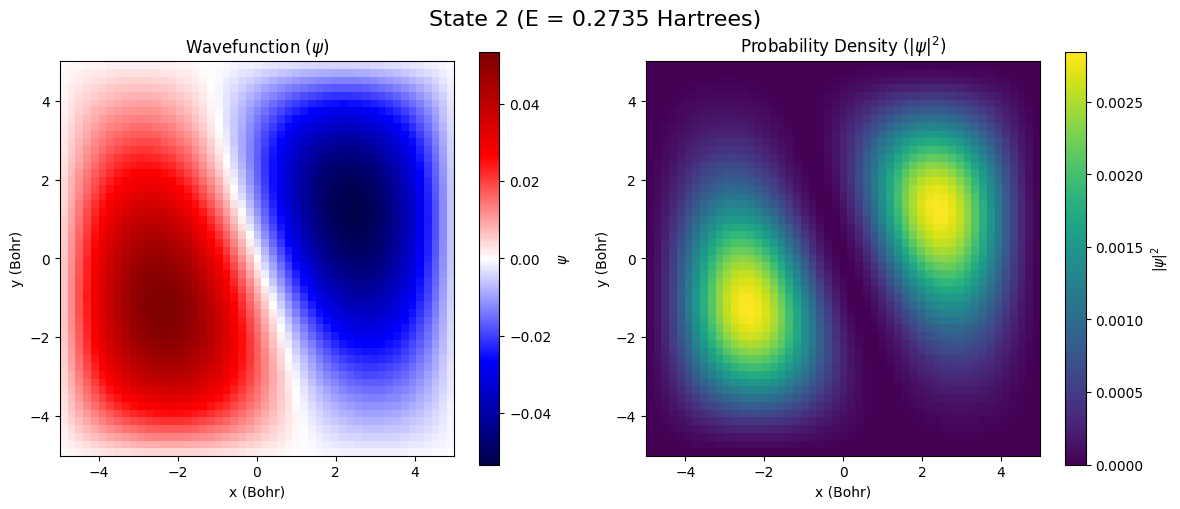

Plotting 3D State 3 as 2D slice at z=0.00


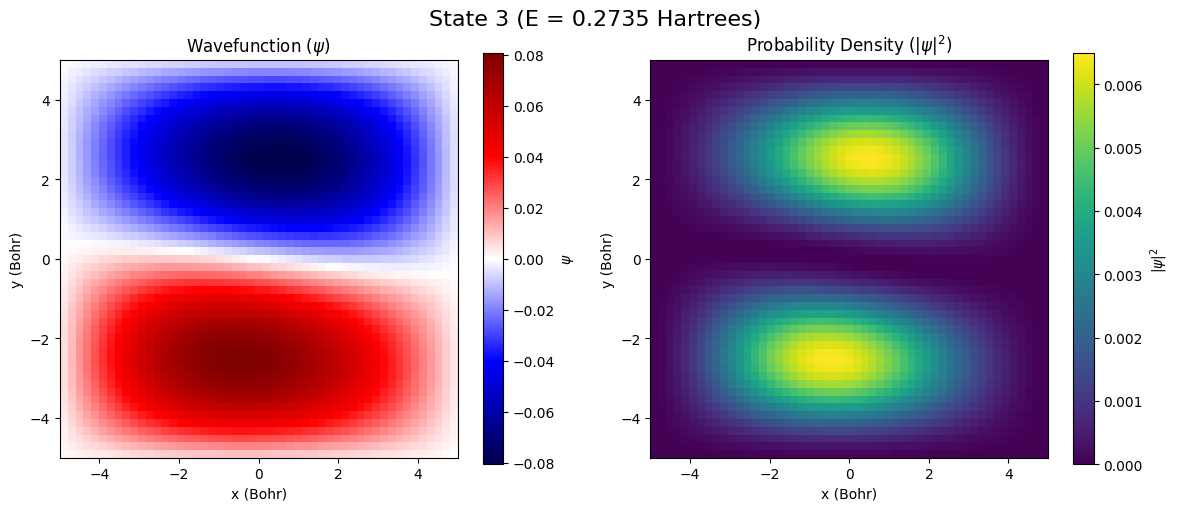

In [16]:
# 3D Box tests
H_3d_box = Hamiltonian(
    N=N_3D,
    L=L_box,
    potential_func=p.V_box_3D_AU,
    ndim=3,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_3d_box.solve()

# Get analytic energies
analytic_energies = p.E_box_3D_analytic_AU(num_states_to_find, L_box, mass)

# Store results in Hamiltonian object for Visualization
H_3d_box.numeric_energies = numeric_energies
H_3d_box.analytic_energies = analytic_energies
H_3d_box.eigenvectors = eigenvectors
H_3d_box.test_case_name = "3D Particle in a Box"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_3d_box = Visualize(H_3d_box, states_to_plot=num_states_to_plot)
vis_3d_box.plot_all()


--- Validation Results ---
State (i)  | Numeric E       | Analytic E      | % Error   
--------------------------------------------------------------------------------
0          | 1.465434        | 1.500000        | 2.3044    %
1          | 2.418120        | 2.500000        | 3.2752    %
2          | 2.418120        | 2.500000        | 3.2752    %
3          | 2.418120        | 2.500000        | 3.2752    %
4          | 3.319989        | 3.500000        | 5.1432    %
5          | 3.319989        | 3.500000        | 5.1432    %
--- Generating plots for 3D Quantum Harmonic Oscillator ---


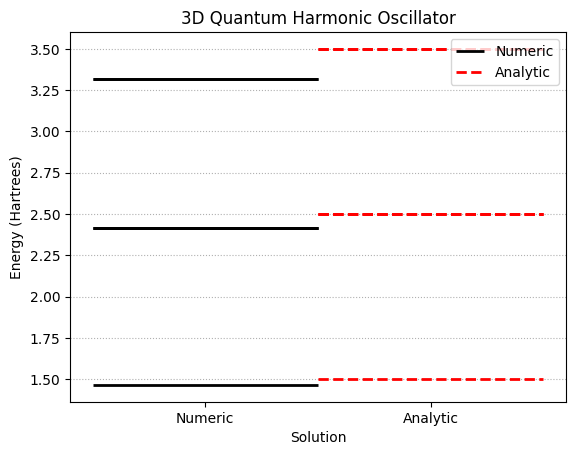

Plotting 3D State 0 as 2D slice at z=0.00


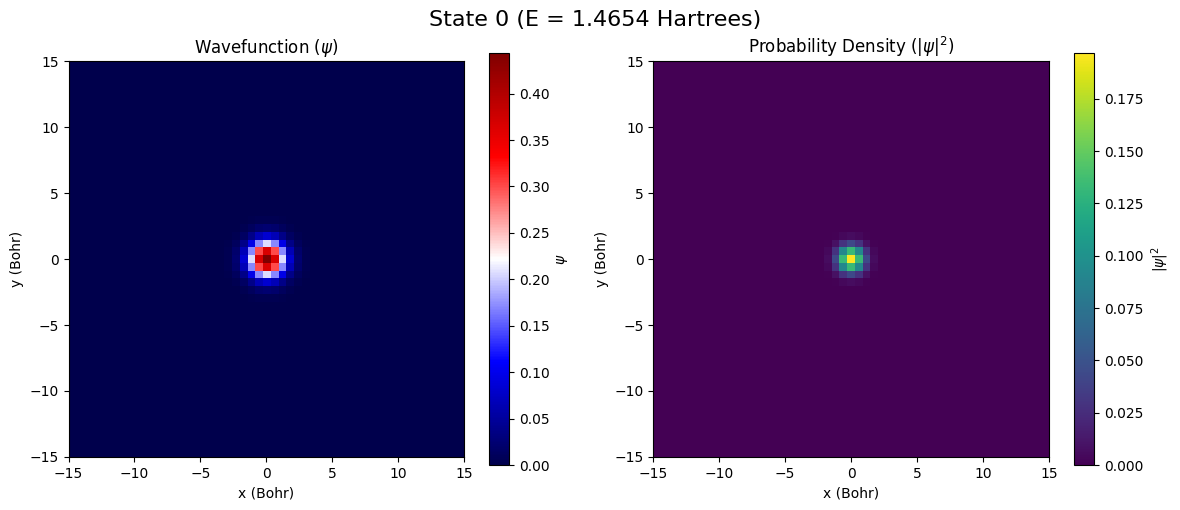

Plotting 3D State 1 as 2D slice at z=0.00


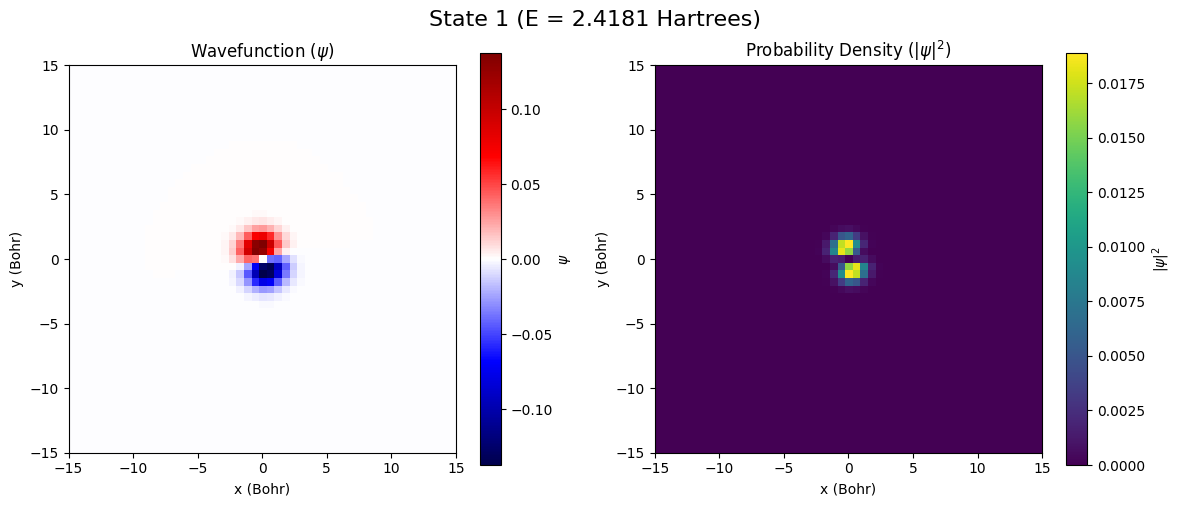

Plotting 3D State 2 as 2D slice at z=0.00


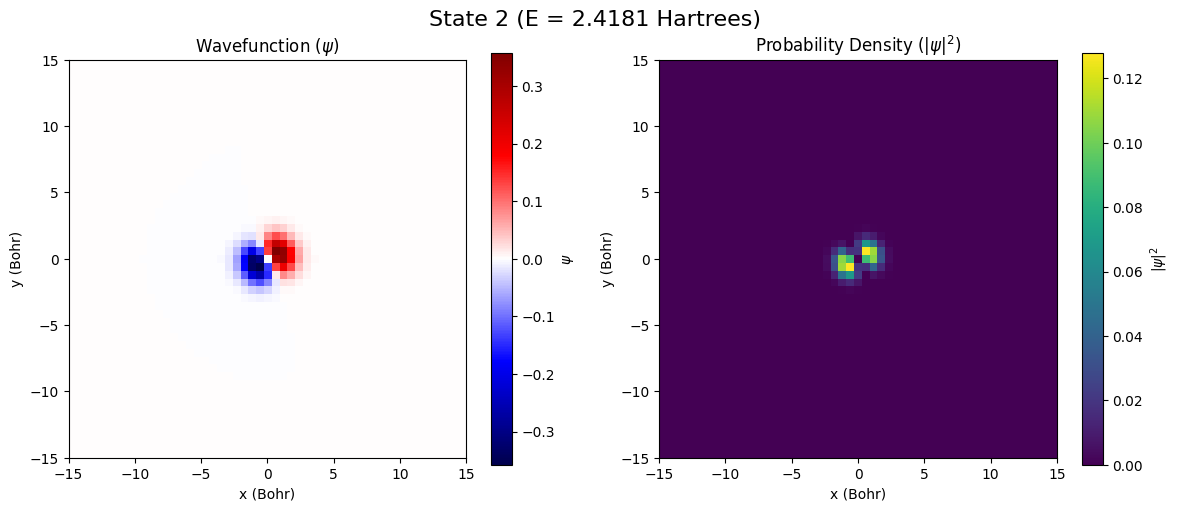

Plotting 3D State 3 as 2D slice at z=0.00


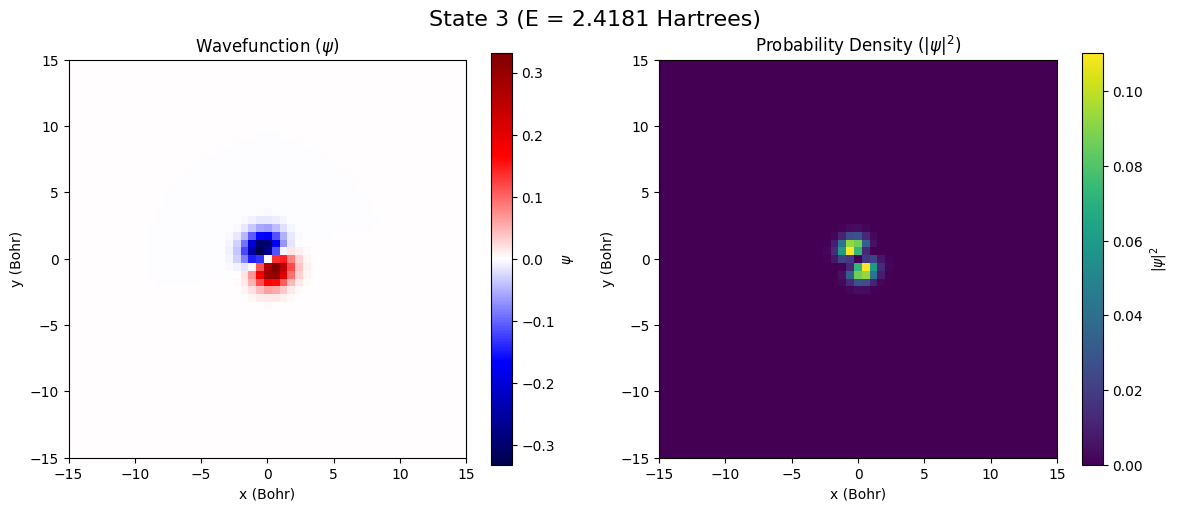

In [17]:
# 3D QHO tests
H_3d_qho = Hamiltonian(
    N=N_3D,
    L=L_qho,
    potential_func=lambda x, y, z, L: p.V_qho_3D_AU(x, y, z, L, k=k_au),
    ndim=3,
    num_states=num_states_to_find,
    mass=mass_type
)

# Solve
numeric_energies, eigenvectors = H_3d_qho.solve()

# Get analytic energies
analytic_energies = p.E_qho_3D_analytic_AU(num_states_to_find, L_qho, mass, k=k_au)

# Store results in Hamiltonian object for Visualization
H_3d_qho.numeric_energies = numeric_energies
H_3d_qho.analytic_energies = analytic_energies
H_3d_qho.eigenvectors = eigenvectors
H_3d_qho.test_case_name = "3D Quantum Harmonic Oscillator"

print("\n--- Validation Results ---")
print(
    f"{'State (i)':<10} | {'Numeric E':<15} | {'Analytic E':<15} | {'% Error':<10}\n{'-'*80}"
)
for i in range(num_states_to_find):
    num_E = numeric_energies[i]
    an_E = analytic_energies[i]
    error = 100 * np.abs(num_E - an_E) / an_E
    print(f"{i:<10} | {num_E:<15.6f} | {an_E:<15.6f} | {error:<10.4f}%")

# Visualization
vis_3d_qho = Visualize(H_3d_qho, states_to_plot=num_states_to_plot)
vis_3d_qho.plot_all()